# Phase 1: Business Case
[Bukas.ph](https://bukas.ph/) is a Y Combinator-backed FinTech startup on a mission to make education affordable in the Philippines. Through their lending platform, students pursuing Diploma, Bachelors, Masters, and non-degree short-courses can obtain affordable financing to fund their tertiary education and training.
<br/>

Their major point of interest is: <br/>
**What kind of students are registering in the platform?**
1. For those who do not finish their registration, where are the bottlenecks and what can be done about it to increase completed registrations?
2. For those who finish, what are their personas and how can the company target them more accurately in terms of marketing?

# Phase 2: Introduction to Data

## Setting up workspace

### Import libraries

In [59]:
#Standard and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style(theme='oceans16')

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Inspect the dataset
Prior to import, some data cleaning measures were already employed to prepare the data  including:
1. Dropping irrelevant rows and columns
2. Fixing `course` column
3. Isolating time from datetime values

In [60]:
df = pd.read_excel('Bukas_Indexed_Applicant_Id.xlsx', index_col='applicant_id')
df.head()

,borrower_city_id,borrower_date_of_birth,borrower_province_id,borrower_school_billing_file,borrower_school_enrollment_file,borrower_zip_code,date_needed,datetime_created,datetime_updated,education_course,...,requested_monthly_interest_rate,requested_monthly_repayment,requested_origination_rate,requested_principal,requested_tenor,requested_total_balance,requested_total_interest_fee,requested_total_interest_rate,requested_total_origination_fee,status
applicant_id,,,,,,,,,,,,,,,,,,,,,
A0001,NaN,NaT,NaN,NaN,NaN,NaN,NaT,2019-05-02T16:27:18.120+07:00,2019-05-08T08:39:56.815+07:00,NaN,...,0.015,0.0000,0.03,0.0,12,0.0,0.0,0.18,0.0,NEW
A0002,NaN,NaT,NaN,NaN,NaN,NaN,NaT,2019-07-08T14:28:16.926+07:00,2019-07-08T14:28:16.926+07:00,NaN,...,0.015,0.0000,0.03,0.0,12,0.0,0.0,0.18,0.0,NEW
A0003,137603.0,1999-09-21,72.0,NaN,NaN,1781.0,NaT,2019-04-25T05:57:01.359+07:00,2019-05-08T08:39:56.908+07:00,Chemical Engineering,...,0.015,2520.8333,0.03,25000.0,12,30250.0,4500.0,0.18,750.0,NEW
A0004,133901.0,1984-04-14,68.0,NaN,NaN,1013.0,NaT,2019-04-25T01:19:10.113+07:00,2019-05-08T08:39:56.913+07:00,Electrical engineering,...,0.015,17343.3333,0.03,172000.0,12,208120.0,30960.0,0.18,5160.0,NEW
A0005,NaN,NaT,NaN,NaN,NaN,NaN,NaT,2019-05-03T22:28:39.016+07:00,2019-05-08T08:39:56.918+07:00,NaN,...,0.015,4033.3333,0.03,40000.0,12,48400.0,7200.0,0.18,1200.0,NEW


In [61]:
describe_num = df.describe().T ; describe_num

,count,mean,std,min,25%,50%,75%,max
borrower_city_id,1286.0,94275.755832,4.871675e+04,12810.0000,42111.500,133905.000,137477.0000,1.759140e+05
borrower_province_id,1286.0,46.156299,2.647685e+01,1.0000,18.000,68.000,70.0000,8.600000e+01
borrower_zip_code,1286.0,2904.135303,1.072062e+04,-1.0000,1229.250,1700.000,3300.0000,3.458980e+05
education_level,2273.0,0.114386,5.784646e-01,0.0000,0.000,0.000,0.0000,5.000000e+00
education_school_id,934.0,3.912206,1.774175e+00,1.0000,2.000,3.000,6.0000,7.000000e+00
guarantor_city_id,531.0,96910.838041,4.887829e+04,12810.0000,42759.000,133907.000,137501.0000,1.759110e+05
guarantor_gross_monthly_salary,2273.0,7693.784206,5.290174e+04,0.0000,0.000,0.000,0.0000,2.000000e+06
guarantor_monthly_rent,2273.0,592.402552,3.430226e+03,0.0000,0.000,0.000,0.0000,8.000000e+04
guarantor_number_of_dependents,2273.0,0.076991,4.193423e-01,0.0000,0.000,0.000,0.0000,5.000000e+00
guarantor_province_id,531.0,47.868173,2.671537e+01,1.0000,18.500,68.000,70.0000,8.400000e+01


In [62]:
describe_cat = df.describe(include='O').T ; describe_cat

,count,unique,top,freq
borrower_school_billing_file,235,235,db4981e4-d3ca-48a3-b2e0-624b6c8e9652/Screensho...,1
borrower_school_enrollment_file,186,186,797533dd-3f67-40dc-a7fb-b586e2730c05/IMG_20190...,1
datetime_created,2273,2273,2019-07-11T02:00:53.392+07:00,1
datetime_updated,2273,2273,2019-07-13T19:35:54.387+07:00,1
education_course,933,558,Bachelor of Science in Accountancy,22
education_dorm_address,178,149,None,18
guarantor_company_address,413,400,Makati City,3
guarantor_company_name,415,380,OFW,7
guarantor_relationship_to_borrower,538,10,Parent,287
guarantor_source_of_funds,415,3,Salary,323


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, A0001 to A2273
Data columns (total 50 columns):
borrower_city_id                      1286 non-null float64
borrower_date_of_birth                1398 non-null datetime64[ns]
borrower_province_id                  1286 non-null float64
borrower_school_billing_file          235 non-null object
borrower_school_enrollment_file       186 non-null object
borrower_zip_code                     1286 non-null float64
date_needed                           1265 non-null datetime64[ns]
datetime_created                      2273 non-null object
datetime_updated                      2273 non-null object
education_course                      933 non-null object
education_dorm_address                178 non-null object
education_level                       2273 non-null int64
education_school_id                   934 non-null float64
guarantor_city_id                     531 non-null float64
guarantor_company_address             413 non-null ob

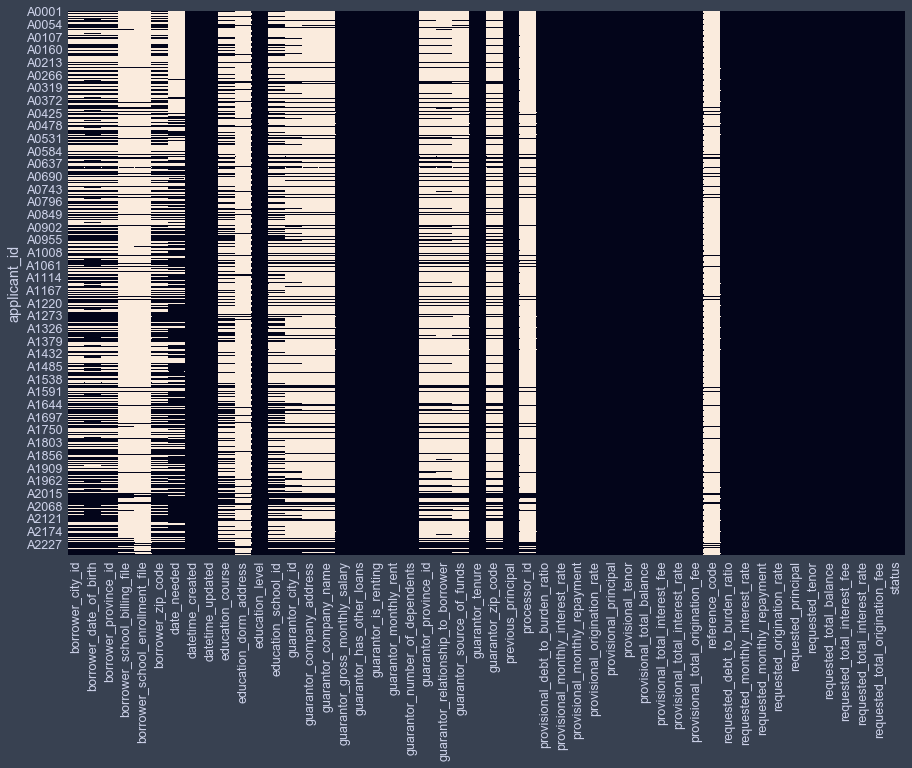

In [64]:
#Visualize where missing values are
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False, ax=ax)

### Observation
1. Some features can be dropped because: 
    * irrelevant to study or only contains links to documents (ie: `borrower_school_billing_file`)
    * only a sum of other features (ie: `requested_total_balance`)
    * redundancy (ie: `provisional_origination_rate` and `provisional_total_origination_fee`)
2. `datetime_created` and `datetime_updated` were not read as datetime due to formatting
3. `education_course` format of values can be standardized
4. Some features appear to be multicolinear (ie: `guarantor_gross_monthly_salary`, `guarantor_has_other_loans`, `guarantor_is_renting`, `provisional_debt_to_burden_ratio`, `education_level`, `borrower_date_of_birth`). We can either:
    * Prioritize feature with more complete values
    * Compress into one feature
5. Other features can be derived from the initial such as:
    * Difference between `provisional_principal` and `requested_principal`
    * Working student or not based on `guarantor_relationship_to_borrower`
    * Implied interest based on `datetime_updated`
    * Course category (business, engineering, etc) based on `education_course`
    * Application completion based on presence/absence of null values per observation
6. Columns can be rearranged to better illustrate user journey by following the order of questions in the online application form.

# Phase 3: Data Cleansing

## Isolate date values

In [65]:
#Get only the first 10 characters because the format is yyyy-mm-ddT(time)
df['datetime_created'] = df['datetime_created'].str[:10]
df['datetime_updated'] = df['datetime_updated'].str[:10]

#Change dtype to datetime
df['datetime_created'] = pd.to_datetime(df['datetime_created'])
df['datetime_updated'] = pd.to_datetime(df['datetime_updated'])

#Confirm change
df.loc[:,['datetime_created', 'datetime_updated']].head()

,datetime_created,datetime_updated
applicant_id,,
A0001,2019-05-02,2019-05-08
A0002,2019-07-08,2019-07-08
A0003,2019-04-25,2019-05-08
A0004,2019-04-25,2019-05-08
A0005,2019-05-03,2019-05-08


## Rearrange columns

The data dictionary has features arranged according to order of questions so we can use it as basis.

In [66]:
#Import data dictionary
data_dict = pd.read_excel('Data Dictionary.xlsx') ; data_dict.head()

#Convert features column to list
new_cols = data_dict['Feature'][1:].tolist()

#Reassign new_cols as df's columns
df = df[new_cols]

#Preview change
df

,datetime_created,datetime_updated,status,previous_principal,date_needed,borrower_date_of_birth,borrower_province_id,borrower_city_id,borrower_zip_code,education_school_id,...,provisional_total_interest_rate,provisional_total_origination_fee,borrower_school_billing_file,borrower_school_enrollment_file,reference_code,education_level,guarantor_monthly_rent,guarantor_number_of_dependents,guarantor_tenure,processor_id
applicant_id,,,,,,,,,,,,,,,,,,,,,
A0001,2019-05-02,2019-05-08,NEW,0,NaT,NaT,NaN,NaN,NaN,NaN,...,0.18,0.00,NaN,NaN,NaN,0,0,0,0,NaN
A0002,2019-07-08,2019-07-08,NEW,0,NaT,NaT,NaN,NaN,NaN,NaN,...,0.18,0.00,NaN,NaN,NaN,0,0,0,0,NaN
A0003,2019-04-25,2019-05-08,NEW,0,NaT,1999-09-21,72.0,137603.0,1781.0,3.0,...,0.18,0.00,NaN,NaN,NaN,0,0,0,0,NaN
A0004,2019-04-25,2019-05-08,NEW,0,NaT,1984-04-14,68.0,133901.0,1013.0,3.0,...,0.18,0.00,NaN,NaN,NaN,0,0,0,0,NaN
A0005,2019-05-03,2019-05-08,NEW,0,NaT,NaT,NaN,NaN,NaN,NaN,...,0.18,0.00,NaN,NaN,NaN,0,0,0,0,NaN
A0006,2019-04-25,2019-05-08,NEW,0,NaT,1985-07-16,72.0,137604.0,1700.0,3.0,...,0.18,0.00,NaN,NaN,NaN,0,0,0,0,NaN
A0007,2019-07-24,2019-07-24,NEW,0,NaT,NaT,NaN,NaN,NaN,NaN,...,0.18,0.00,NaN,NaN,NaN,0,0,0,0,NaN
A0008,2019-04-30,2019-05-08,INITIAL_OFFER_ACCEPTED,0,NaT,1999-12-10,20.0,45645.0,4322.0,NaN,...,0.18,0.00,NaN,NaN,NaN,0,0,0,0,NaN
A0009,2019-05-15,2019-05-15,NEW,0,NaT,NaT,NaN,NaN,NaN,NaN,...,0.18,0.00,NaN,NaN,NaN,0,0,0,0,NaN


## Drop sample and test rows

In [67]:
import re

#Using regular expression, isolate sample rows
sample_rows = df[(df['guarantor_company_name'].str.contains(r'test', 
    flags=re.I, na=False)) | (df['guarantor_company_name'].str.contains(
    r'sample', flags=re.I, na=False)) | (df['education_course'].str.contains(
    r'bukas', flags=re.I, na=False))].index.tolist()

sample_rows

[u'A1295', u'A1594', u'A1930', u'A2065', u'A2099', u'A2175', u'A2197']

In [68]:
#Current shape
print('Current shape: (%d, %d)' % df.shape)

#Drop rows
df = df.drop(sample_rows, axis=0)

#New shape
print('New shape: (%d, %d)' % df.shape)

Current shape: (2273, 50)
New shape: (2266, 50)


## Drop columns with 0 variance

In [69]:
#Preview features with 0 variance based on describe
low_var = describe_num[describe_num['min']==describe_num['max']] ; low_var

,count,mean,std,min,25%,50%,75%,max
previous_principal,2273.0,0.000,0.000000e+00,0.000,0.000,0.000,0.000,0.000
provisional_monthly_interest_rate,2273.0,0.015,4.008093e-16,0.015,0.015,0.015,0.015,0.015
provisional_origination_rate,2273.0,0.030,8.016186e-16,0.030,0.030,0.030,0.030,0.030
provisional_tenor,2273.0,12.000,0.000000e+00,12.000,12.000,12.000,12.000,12.000
provisional_total_interest_rate,2273.0,0.180,5.691145e-15,0.180,0.180,0.180,0.180,0.180
requested_monthly_interest_rate,2273.0,0.015,4.008093e-16,0.015,0.015,0.015,0.015,0.015
requested_origination_rate,2273.0,0.030,8.016186e-16,0.030,0.030,0.030,0.030,0.030
requested_tenor,2273.0,12.000,0.000000e+00,12.000,12.000,12.000,12.000,12.000
requested_total_interest_rate,2273.0,0.180,5.691145e-15,0.180,0.180,0.180,0.180,0.180


In [70]:
#Previous shape
df.shape

(2266, 50)

In [71]:
#Current shape
print('Current shape: (%d, %d)' % df.shape)

#Put low var feature to list
low_var_features = low_var.index

#Drop columns in list
df = df.drop(columns=low_var_features, axis=1)

#New shape
print('New shape: (%d, %d)' % df.shape)

Current shape: (2266, 50)
New shape: (2266, 41)


## Inspect registration funnel

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2266 entries, A0001 to A2273
Data columns (total 41 columns):
datetime_created                      2266 non-null datetime64[ns]
datetime_updated                      2266 non-null datetime64[ns]
status                                2266 non-null object
date_needed                           1258 non-null datetime64[ns]
borrower_date_of_birth                1391 non-null datetime64[ns]
borrower_province_id                  1279 non-null float64
borrower_city_id                      1279 non-null float64
borrower_zip_code                     1279 non-null float64
education_school_id                   928 non-null float64
education_course                      927 non-null object
education_dorm_address                176 non-null object
requested_debt_to_burden_ratio        2266 non-null float64
requested_monthly_repayment           2266 non-null float64
requested_principal                   2266 non-null float64
requested_total_balance        

After removing test rows, we still have 2267 observations. We can already get an idea of fall out rate based on the number of missing values (which we will reassign later and add another feature to say where they stopped). There is greater fall out for questions in the next page (ie: `borrower_date_of_birth` vs `education_school_id`) than questions in the same page (ie: `borrower_date_of_birth` vs `borrower_province_id`).  Hence, other than reducing the number of questions during the registration, it will also be helpful to keep them in less pages.

## Handle column values

### status

In [73]:
df['status'].value_counts()

NEW                       1353
INITIAL_OFFER_ACCEPTED     465
INITIAL_OFFER              241
APPROVED                   130
REVISIONS_REQUIRED          50
REJECTED                    13
ON_HOLD                     13
REVISIONS_COMPLETED          1
Name: status, dtype: int64

As per consultation with Bukas.ph, the categories are defined as:
1. **NEW** - new applicants who haven't gone past the Initial Offer page
2. **INITIAL_OFFER** - applicants who were last at Initial Offer page
3. **INITIAL_OFFER_ACCEPTED** - applicants who accepted the Initial Offer and landed on the following page (Guarantor)
4. Applicants who finish the online registration are called and fall into 2 groups:
    * Needs revisions
        * **REVISIONS_REQUIRED** - with pending revisions to make
        * **REVISIONS_COMPLETED** - with complete revisions and should be contacted again soon
    * With complete and accurate profile
        * **APPROVED** - loan is approved
        * **REJECTED** - loan is rejected
    * Cancelled/unresponsive
        * **ON_HOLD** - did not respond/cannot be reached
        * **CANCELLED** - cancelled application
    
However for cancelled/unresponsive, it's unclear where exactly in the process they stopped. It's only 14 observations so we can manually reassign to other categories. Let's inspect the data:

In [74]:
#Inspect values with less observations
df[(df['status']=='ON_HOLD') | (df['status']=='CANCELLED')].T

applicant_id,A0629,A0740,A0820,A0898,A1020,A1057,A1126,A1132,A1133,A1778,A2003,A2090,A2128
datetime_created,2019-05-14 00:00:00,2019-06-04 00:00:00,2019-05-23 00:00:00,2019-06-10 00:00:00,2019-05-07 00:00:00,2019-05-28 00:00:00,2019-05-02 00:00:00,2019-07-02 00:00:00,2019-04-28 00:00:00,2019-05-22 00:00:00,2019-06-11 00:00:00,2019-07-23 00:00:00,2019-07-23 00:00:00
datetime_updated,2019-06-07 00:00:00,2019-06-07 00:00:00,2019-06-07 00:00:00,2019-06-13 00:00:00,2019-07-02 00:00:00,2019-06-19 00:00:00,2019-07-01 00:00:00,2019-07-02 00:00:00,2019-07-02 00:00:00,2019-07-12 00:00:00,2019-07-15 00:00:00,2019-07-23 00:00:00,2019-07-26 00:00:00
status,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD,ON_HOLD
date_needed,2019-05-25 00:00:00,2019-06-07 00:00:00,2019-05-24 00:00:00,2019-06-11 00:00:00,NaT,2019-05-31 00:00:00,2019-06-26 00:00:00,2019-08-01 00:00:00,NaT,2019-07-25 00:00:00,2019-09-30 00:00:00,2019-08-09 00:00:00,2019-08-05 00:00:00
borrower_date_of_birth,1998-07-01 00:00:00,2000-10-30 00:00:00,2000-08-26 00:00:00,1995-12-21 00:00:00,1998-07-16 00:00:00,1997-11-26 00:00:00,1999-04-19 00:00:00,1999-08-18 00:00:00,1999-07-13 00:00:00,1996-05-08 00:00:00,1996-08-23 00:00:00,1997-12-02 00:00:00,NaT
borrower_province_id,68,20,72,11,7,68,70,11,18,11,70,70,NaN
borrower_city_id,133901,45624,137601,31411,23123,133901,137404,31410,42109,31402,137403,137404,NaN
borrower_zip_code,1013,4301,1744,3019,1630,1013,1116,3000,4103,3016,1610,1106,NaN
education_school_id,6,2,3,2,6,6,6,NaN,3,2,5,2,NaN
education_course,Bachelor of Arts major in Mass Communication w...,BS in Accountancy,BS Chemical Engineering,Business Administration,AB Mass Communication with specialization in B...,Cruiseline major in culinary arts,BS-ITTM,NaN,BS Mechanical Engineering,Bachelor of Science in Business Administration...,BSBA- Marketing,BS CIVIL ENGINEERING,NaN


We know that `education_level`, `guarantor_number_of_dependents`, and `guarantor_tenure` (aka additional guarantor info) are not in the online registration form, meaning this info was gathered during successful phone calls. We can get where they stopped by looking at 0's and NaNs for the columns. 

For example, A0629 submitted the required `borrower_school_billing_file` but has no meaningful values on additional guarantor info. This means the applicant finished the online registration but did not finish the call.

On the other hand, A1132 has no uploaded `borrower_school_billing_file` and has NaN for `guarantor_relationship_to_borrower`. Meaning, the applicant has seen the provisional offer but did not move forward beyond that.

In [75]:
#Manually assign values for 2 observations
df.loc['A1132','status'] = 'INITIAL_OFFER'
df.loc['A1133','status'] = 'INITIAL_OFFER_ACCEPTED'

The scope of this project is only the user journey on the website. Hence, we only care if they finish the online registration. We're grouping other categories that required submission of application into `SUBMITTED`.

In [76]:
#List of categories to transform to 'SUBMITTED'
submitted = ['APPROVED', 'REJECTED', 'REVISIONS_REQUIRED', 
             'REVISIONS_COMPLETED', 'CANCELLED', 'ON_HOLD']

#Transform values
df['status'][df['status'].isin(submitted)] = 'SUBMITTED'

In [77]:
df['status'].value_counts()

NEW                       1353
INITIAL_OFFER_ACCEPTED     466
INITIAL_OFFER              242
SUBMITTED                  205
Name: status, dtype: int64

Classes are now more balanced than before.

### borrower_date_of_birth and derived age

In [78]:
#Derive age feature
df['borrower_age'] = (pd.Timestamp('now') - df['borrower_date_of_birth']).astype('<m8[Y]')

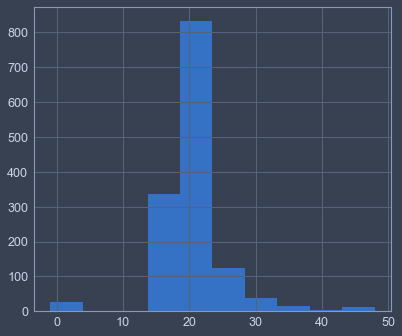

In [79]:
df['borrower_age'].hist()

In [80]:
#Review measures of central tendency
print('Mean: %.2f' % df['borrower_age'].mean())
print('Median: %.2f' % df['borrower_age'].median())
print('Mode: %.2f' % df['borrower_age'].mode())

Mean: 20.45
Median: 20.00
Mode: 19.00


Distribution is right tailed but measures of central tendecy are close. This even out the effects of outliers and variability, we'll use the mean of all 3 measures as the replacement age value. This also makes sense contextually because this is around the age students begin college.

There are also suspicious values that are lower than 10, hence, unlikely to be applying for college.

#### Handle nulls

In [81]:
#Store replacement value in variable
x_age = np.mean([df['borrower_age'].mean(), df['borrower_age'].median(), df['borrower_age'].mode()])

#Assign value to nulls
df['borrower_age'][df['borrower_age'].isnull()] = x_age

#Confirm
df['borrower_age'].value_counts(bins=10).sort_index()

(-1.05, 3.9]      27
(3.9, 8.8]         2
(8.8, 13.7]        2
(13.7, 18.6]     335
(18.6, 23.5]    1707
(23.5, 28.4]     123
(28.4, 33.3]      39
(33.3, 38.2]      15
(38.2, 43.1]       4
(43.1, 48.0]      12
Name: borrower_age, dtype: int64

#### Handle suspicious values

In [82]:
df['borrower_age'].value_counts().sort_index().head(10)

-1.0     13
 0.0     11
 1.0      2
 2.0      1
 6.0      2
 13.0     2
 14.0     1
 15.0     5
 16.0    21
 17.0    52
Name: borrower_age, dtype: int64

Ages 15 and below have few observations.

In [83]:
#Inspect rows
df[df['borrower_age'] <= 15].loc[:, ['borrower_date_of_birth', 'education_course', 'borrower_age']].sort_values('borrower_age').sort_index()

,borrower_date_of_birth,education_course,borrower_age
applicant_id,,,
A0160,2005-11-25,NaN,13.0
A0185,2019-07-24,NaN,0.0
A0346,2003-11-07,Grade 10,15.0
A0356,2013-03-23,Hums,6.0
A0637,2019-12-22,AB Masccomunication Major in Broadcasting,-1.0
A0710,2018-02-02,NaN,1.0
A0756,2017-04-05,computer science,2.0
A0804,2019-09-04,Bachelor of Arts in Language and Literature St...,-1.0
A0808,2019-12-22,Bachelor of Science in Business Administration,-1.0


Observations appear to be meaningful observation (based on education_course) but applicants input the wrong year because the application form was not data validated. We can impute it with x_age like we handled missing values.

There are also applications that cannot be entertained by Bukas.ph now because they only offer loans for undergraduate and graduate studies. We need to drop rows for applications from non-senior high students (because shs students may be applying for the incoming semester). These are A1743 and A0346.

In [84]:
#Current shape
print('Current shape: (%d, %d)' % df.shape)

#Drop non-college applicants
df = df.drop(['A1743', 'A0346'])

#New shape
print('New shape: (%d, %d)' % df.shape)

Current shape: (2266, 42)
New shape: (2264, 42)


In [85]:
#Impute values
df['borrower_age'][df['borrower_age'] <= 15] = x_age

### borrower_province_id, borrower_city_id, borrower_zip_code 

In [86]:
df[df['borrower_province_id'].isnull()].head()

,datetime_created,datetime_updated,status,date_needed,borrower_date_of_birth,borrower_province_id,borrower_city_id,borrower_zip_code,education_school_id,education_course,...,provisional_total_origination_fee,borrower_school_billing_file,borrower_school_enrollment_file,reference_code,education_level,guarantor_monthly_rent,guarantor_number_of_dependents,guarantor_tenure,processor_id,borrower_age
applicant_id,,,,,,,,,,,,,,,,,,,,,
A0001,2019-05-02,2019-05-08,NEW,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,19.815241
A0002,2019-07-08,2019-07-08,NEW,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,19.815241
A0005,2019-05-03,2019-05-08,NEW,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,19.815241
A0007,2019-07-24,2019-07-24,NEW,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,19.815241
A0009,2019-05-15,2019-05-15,NEW,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,19.815241


In [87]:
df['status'][df['borrower_province_id'].isnull()].value_counts()

NEW                       977
INITIAL_OFFER_ACCEPTED      8
INITIAL_OFFER               1
SUBMITTED                   1
Name: status, dtype: int64

Almost half of the applicants are already lost at this point that's why there are null values. For non-`NEW` applications, let's see if we can still impute values.

In [88]:
df[(df['borrower_province_id'].isnull()) & (df['status']!='NEW')]

,datetime_created,datetime_updated,status,date_needed,borrower_date_of_birth,borrower_province_id,borrower_city_id,borrower_zip_code,education_school_id,education_course,...,provisional_total_origination_fee,borrower_school_billing_file,borrower_school_enrollment_file,reference_code,education_level,guarantor_monthly_rent,guarantor_number_of_dependents,guarantor_tenure,processor_id,borrower_age
applicant_id,,,,,,,,,,,,,,,,,,,,,
A1486,2019-07-09,2019-07-09,INITIAL_OFFER_ACCEPTED,2019-08-01,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,19.815241
A1628,2019-07-09,2019-07-10,INITIAL_OFFER_ACCEPTED,2019-08-07,1988-10-01,NaN,NaN,NaN,NaN,NaN,...,0.0,4ea81c2b-fe72-416a-9c38-22cdbf095e5a/_20190709...,NaN,NaN,0,5000,0,0,NaN,30.000000
A1641,2019-07-08,2019-07-08,INITIAL_OFFER_ACCEPTED,2019-07-09,2000-06-12,NaN,NaN,NaN,5.0,BSED Major in History,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,19.000000
A1832,2019-07-20,2019-07-20,INITIAL_OFFER_ACCEPTED,2019-07-30,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,19.815241
A1840,2019-07-13,2019-07-13,INITIAL_OFFER,2019-09-10,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,19.815241
A1879,2019-07-14,2019-07-14,INITIAL_OFFER_ACCEPTED,2019-08-19,2000-09-19,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,18.000000
A1937,2019-06-03,2019-07-16,INITIAL_OFFER_ACCEPTED,2019-08-10,2001-09-03,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,17.000000
A1956,2019-07-15,2019-07-16,INITIAL_OFFER_ACCEPTED,2020-02-10,NaT,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,4000,0,0,NaN,19.815241
A2009,2019-07-15,2019-07-15,INITIAL_OFFER_ACCEPTED,2019-10-10,2000-09-24,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,NaN,18.000000


Some rows registered themselves or family members as their guarantor. We can use guarantor info to impute values. For `A1641`, we can use dorm address to get location values.

#### Impute values for rows w/ guarantors

In [89]:
#Get rows to change
mask = (df['borrower_province_id'].isnull()) & \
(df['status']!='NEW') & (df['guarantor_relationship_to_borrower'].notnull())
to_impute = df['guarantor_relationship_to_borrower'][mask].index.tolist()
to_impute

[u'A1628', u'A1832', u'A1840', u'A1937', u'A1956']

In [90]:
for index in to_impute:
    df.loc[index, 'borrower_province_id'] = df.loc[index, 'guarantor_province_id'] 
    df.loc[index, 'borrower_city_id'] = df.loc[index, 'guarantor_city_id'] 
    df.loc[index, 'borrower_zip_code'] = df.loc[index, 'guarantor_zip_code'] 
    print('Successfully changed location values for %s!' % index)

Successfully changed location values for A1628!
Successfully changed location values for A1832!
Successfully changed location values for A1840!
Successfully changed location values for A1937!
Successfully changed location values for A1956!


#### Handle `A1641`
Values based on labelling dictionary provided by Bukas.ph.

In [91]:
#Impute values
df.loc['A1641', 'borrower_province_id'] = 68
df.loc['A1641', 'borrower_city_id'] = 133909
df.loc['A1641', 'borrower_zip_code'] = 1002

df.loc['A1641',:][5:8]

borrower_province_id        68
borrower_city_id        133909
borrower_zip_code         1002
Name: A1641, dtype: object

### education_school_id, education_course

In [92]:
raw_courses = df['education_course'][df['education_course'].notnull()]
raw_courses.head(20)

applicant_id
A0003                            Chemical Engineering
A0004                          Electrical engineering
A0006                       MS Mechanical Engineering
A0011                          Electrical Engineering
A0014                           BS Medical Technology
A0017               Bachelor Of Science in Psychology
A0019    BS in Cruiseline Operation In Hotel Services
A0022        Bachelor of Science in Civil Engineering
A0023                                    Architecture
A0024                       BS Electrical Engineering
A0026              Bachelor of hospitality management
A0041                                 Multimedia Arts
A0042                                 Interior Design
A0043                                   BS Psychology
A0055                         BS Computer Engineering
A0058       Bachelor of Science in Medical Technology
A0059                                         Tourism
A0062                                  B.S Psychology
A0065        Ba

Based on the available subset of data, groups can be Engineering, Psychology, Tourism. We can still view courses that don't belong to any of these.

In [93]:
pattern = r'engineer|psychology|tourism|education|medical|account|culinary|\
cloca|design|hospitality|media|international|foreign|finan|audit|marketing|\
information technology|business|law|legal|juris|architecture|nursing|\
political|computer|communication|medicine|criminology|hrm|hotel|restaurant|\
broadcast|education|teach|bsed|bs ed|clohs|film|language|industrial|bsittm|travel|\
bsit|social|bsba|bshm|bstm|journalism|ece|mba|math|transport|sports|cako|\
information|bsca|abs|shs|stem|humss|bsit|bs it|med tech|medtech|senior|pol|\
customs|grade|food|advertising|public|econ|business|bussiness|bsihm|\
criminilogy|english|bsa|mma|bsais|entrepreneur|ttm|nurse|comm|beed|comp|\
construction|cem|supply|office|abm|a.b.m|hra|i.s|bist|bsn|it|bscs|cpe|bsma'
raw_courses[~raw_courses.str.contains(pattern, flags=re.I, na=False)]

applicant_id
A0179    Bachelor of Scien
A0197                   G4
A0296           Management
A0356                 Hums
A0378     2nd year college
A0421                  SEM
A0451                   CE
A0666             Graduate
A0669                  SEM
A1094                  SEM
A1232       Not applicable
A1273                   JD
A1308             IEGS-LLE
A1388                  MBS
A1560            BSEMC-GAD
A1658              Masters
A2067                11112
A2244              Geology
Name: education_course, dtype: object

There are still values that we need to inspect later. But for the values we removed, we can categorize by:

<br/>

| Category | Inclusions |
| --- | --- |
| Engineering | anything with engineering |
| Business and Accountancy | business, office, supply, construction management, economics, entrepreneurship, mba, accountancy, financial management, audit |
| Social Sciences | psychology, history, political science |
| Education | bees, bsed, education 
| Hospitality | tourism, culinary, restaurant, hotel management |
| Law | juris doctor, legal management, law |
| IT & Computer Science | IT (and variations), computer science |
| Communication | journalism, mma, marketing, advertising, broadcast, film |
| Health Sciences | medtech, nursing, sports science |
| Hard Sciences | geology, math |
| Design | architecture, interior design |
| Others | criminology, customs, interisciplinary studies |


In [94]:
#Create patterns dictionary
cat_dict = {
    'engineering' : r'engineer|ece|industrial|cpe|[cs]em|technical', 
    'baa' : r'account|finan|audit|business|bsba|bsma|mb[as]|buss?iness|bsa|entrepreneur|construction|supply|office|a.?b.?m|hra', 
    'liberal_law' : r'humm?ss?|polsci|public|social|psychology|political|history|jd|law|legal|juris|language|literature', 
    'hospitality' : r'ttm|clohs|cloca|tourism|hotel|restaurant|culinary|hospitality|hrm|travel|bshm|bstm|cako|bsca|bsihm|food', 
    'education' : r'education|teach|bs ?ed|beed|mat ', 
    'it' : r'bs ?it|information|comp |i.s|bist|bsais|computer science|bs ?cs', 
    'comm_arts' : r'[ab][ba] i?n? ?communication|communication arts|journalism|broadcast|mma|emc|marketing|advertising|film|architecture|interior|an comm|cinema|bacomm|convergent|conmed|media|mass communication|bachelor of arts in communication', 
    'health' : r'health|medical|med ?tech|sport|nurs|medicine|bsn', 
    'diplomacy' : r'foreign|diplomacy|international relation', 
    'others' : r'crim|customs|math|geology'
}

In [95]:
#Create column of nans
df['education_category'] = np.nan

#Assign categories
for key, value in cat_dict.items():
    df['education_category'][df['education_course'].str.contains(value, flags=re.I, na=False)] = key

In [96]:
#Review value counts for new feature
df['education_category'].value_counts()

hospitality    205
baa            163
engineering    134
it              93
comm_arts       90
liberal_law     88
health          66
education       26
diplomacy       17
others          11
Name: education_category, dtype: int64

In [97]:
unassigned = df['education_course'][(df['education_category'].isnull()) & (df['education_course'].notnull())]
unassigned

applicant_id
A0179              Bachelor of Scien
A0197                             G4
A0210                            SHS
A0293                       Grade 12
A0296                     Management
A0334                           STEM
A0378               2nd year college
A0379             Senior High School
A0422                    Senior high
A0451                             CE
A0534                           STEM
A0618                             IT
A0666                       Graduate
A1002             Senior high school
A1039             senior high school
A1062                             It
A1129             Senior High School
A1232                 Not applicable
A1270                           Stem
A1308                       IEGS-LLE
A1326    Grade 12 Senior High School
A1452                        11 STEM
A1489                           STEM
A1658                        Masters
A1699                       Grade 12
A1700                             IT
A1704             Senior 

In [98]:
#Assign for other known category
it_list = unassigned[unassigned.str.contains(r'I[Tt]', na=False)].index.tolist()
df.loc[it_list, 'education_category'] = 'it'
df.loc['A0451', 'education_category'] = 'engineering'
df.loc['A0296', 'education_category'] = 'baa'
df.loc[['A1308', 'A1658'], 'education_category'] = 'others'

There are still unassigned categories. Since these are SHS students, we can impute values by looking at the popular course category per school.

In [99]:
#Get index of remaining unassigned
unassigned = df['education_course'][(df['education_category'].isnull()) & (df['education_course'].notnull())]
unassigned = unassigned.index.tolist()

In [100]:
#Create a dictionary of schools and popular courses
popular_cat = {}
for i in range(1,8):
    cat = df['education_category'][df['education_school_id']==float(i)].mode()[0]
    popular_cat[float(i)] = cat
    
popular_cat

{1.0: 'baa',
 2.0: 'baa',
 3.0: 'engineering',
 4.0: 'it',
 5.0: 'hospitality',
 6.0: 'hospitality',
 7.0: 'liberal_law'}

In [101]:
#Transform values
for row in unassigned:
    school = df.loc[row,'education_school_id']
    df.loc[row,'education_category'] = popular_cat[school]

In [102]:
#Confirm change
df.loc[unassigned,['education_school_id', 'education_category']]

,education_school_id,education_category
applicant_id,,
A0179,2.0,baa
A0197,3.0,engineering
A0210,3.0,engineering
A0293,6.0,hospitality
A0334,3.0,engineering
A0378,5.0,hospitality
A0379,6.0,hospitality
A0422,2.0,baa
A0534,3.0,engineering


Based on previous run of df.info(), we know there are 925 non-null objects for education_school_id and 924 education_course.

In [103]:
#Get row with no course value
school_notnull = df[df['education_school_id'].notnull()].index.tolist()
course_notnull = df[df['education_course'].notnull()].index.tolist()

df.loc[list(set(school_notnull)-set(course_notnull)),:].index.tolist()

[u'A1931']

In [104]:
#Impute value
df.loc['A1931','education_category'] = popular_cat[df.loc['A1931','education_school_id']]

In [105]:
#Confirm
df.loc['A1931',['education_school_id','education_category']]

education_school_id      2
education_category     baa
Name: A1931, dtype: object

### requested_debt_burden_ratio

### requested_principal

## Drop irrelevant, redundant, and/or sparse columns
<br/>

requested_debt_to_burden_ratio        2264 non-null float64
requested_principal                   2264 non-null float64
requested_total_balance               2264 non-null float64
requested_total_interest_fee          2264 non-null float64
requested_total_origination_fee       2264 non-null float64

| Column to drop | Reason |
| --- | --- |
| `date_needed` | sparse and not meaningful |
| `borrower_date_of_birth` | already derived age |
| `borrower_zip_code` | province and city is enough |
| `education_course` | already derived category |
| `education_dorm_address` | sparse and not meaningful |
| `requested_monthly_repayment` | redundant |
| `requested_total_balance` | sum of other features |
| `requested_total_interest_fee` | irrelevant |
| `requested_total_origination_fee` | irrelevant |

In [49]:
df.head(0).T

applicant_id
datetime_created
datetime_updated
status
date_needed
borrower_date_of_birth
borrower_province_id
borrower_city_id
borrower_zip_code
education_school_id
education_course


# Recommendation
## Registration process
1. Reduce pages to lessen fall out.
2. Data validation on `borrower_date_of_birth` to accept only 18+ since that's a requirement anyway.
3. Suggest values for `borrower_province_id` and `borrower_city_id` based on device's current location to make registration more seamless.